In [ ]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random as rnd

In [ ]:
# Generate two Gaussian random numbers with sigma=1
def gauss_rnd(sigma):
    w = 2
    while (w >= 1):
        rx1 = 2 * rnd.random() - 1
        rx2 = 2 * rnd.random() - 1
        w = rx1*rx1 + rx2*rx2

    w = math.sqrt(-2*math.log(w)/w);
    return sigma*rx1*w, sigma*rx2*w

# The potential
def V(r):
    return 4*epsilon* ((math.pow(sig, 12)*math.pow(r, -12)) - (math.pow(sig, 6) *math.pow(r, -6))) #
#    return 20*(math.pow((r - 1),2))

# The force
def F(r):
    return 4*epsilon* ((12*math.pow(sig, 12)*math.pow(r, -13)) - (6*math.pow(sig,6)*math.pow(r, -7)))
#    return (-1)*20*2*(r)

# Calculate the shortest periodic distance, unit cell [0,bx],[0,by]
def pbc_dist(x1,y1,x2,y2,bx,by):
    dx = x1 - x2
    dy = y1 - y2
    if dx < -0.5*bx:
        dx += bx
    if dx > 0.5*bx:
        dx -= bx
    if dy < -0.5*by:
        dy += by
    if dy > 0.5*by:
        dy -= by
    return dx, dy, math.sqrt(dx*dx + dy*dy)

In [ ]:
# number of particles TO FILL
n = 40

# box dimension
bx = 4
by = 4

# temperature TO FILL
T = 300

# Mass of Argon atoms (in u.m.a.)
mass = 39.95

# time step  TO FILL
dt = 0.01
# number of time step TO FILL
nsteps = 5000  # 50 ps / 0.01 ps per step

#Lennard-Jones potential constants TO FILL
sig = 0.34
epsilon = 0.979

In [ ]:
# Start condition
x = []
y = []
vx = []
vy = []
fx = []
fy = []
for i in range(0,n):
    # Generate initial positions separated by at least 1.5
    dmin = 0
    while dmin < 0.35:
        dmin = bx
        rx = bx*rnd.random()
        ry = by*rnd.random()
        for j in range (0,i):
            dx, dy, r = pbc_dist(x[j],y[j],rx,ry,bx,by)
            if r < dmin:
                dmin = r

    x.append(rx)
    y.append(ry)
    # Generate velocities from a Gaussian distribution
    KB = 0.008
    factor = math.sqrt(T * KB / mass)
    g1, g2 = gauss_rnd(factor)
 #   g1 = 0
 #   g2 = 0
    vx.append(g1)
    vy.append(g2)
    # Make the force array
    fx.append(0)
    fy.append(0)

In [ ]:
plt.ioff()
plt.axis([0,bx,0,by])
plt.plot(x,y, 'ro', markersize=25)
plt.draw()

In [ ]:
outt = []
ekin = []
epot = []
etot = []
for step in range(0,nsteps+1):

    v = 0
    ek = 0

    for i in range(0,n):
        fx[i] = 0
        fy[i] = 0

    for i in range(0,n):
        for j in range(i+1,n):
            dx, dy, r = pbc_dist(x[i],y[i],x[j],y[j],bx,by)
            v  += V(r)
            fij = F(r)
            fx[i] += fij*dx/r
            fy[i] += fij*dy/r
            fx[j] -= fij*dx/r
            fy[j] -= fij*dy/r

#    if step % 100 == 0:
#         ra = int(n*rnd.random())

#    ek = 0
    for i in range(0,n):
        if step > 0:
        # Update the velocities with a half step
            vx[i] += fx[i]*0.5*dt/mass
            vy[i] += fy[i]*0.5*dt/mass

#        if step % 100 == 0:
#             vx[ra], vy[ra] = gauss_rnd(T)

        ek += 0.5*mass*(vx[i]*vx[i] + vy[i]*vy[i])

        # Update the velocities with a half step
        vx[i] += fx[i]*0.5*dt/mass
        vy[i] += fy[i]*0.5*dt/mass

        # Update the coordinates
        x[i]  += vx[i]*dt
        y[i]  += vy[i]*dt
        if x[i] < 0:
            x[i] += bx
        if x[i] >= bx:
            x[i] -= bx
        if y[i] < 0:
            y[i] += by
        if y[i] >= by:
            y[i] -= by

    if step % 10 == 0:
#        print step
        outt.append(step*dt)
        ekin.append(ek)
        epot.append(v)
        etot.append(v + ek)

        plt.clf()
        plt.axis([0,bx,0,by])
        plt.plot(x,y, 'ro', markersize=25)
        plt.draw()
        plt.pause(0.02)

# plt.axis([0, bx, 0, by])
# plt.plot(x, y, 'ro', markersize=25)
# plt.show()

Output hidden; open in https://colab.research.google.com to view.

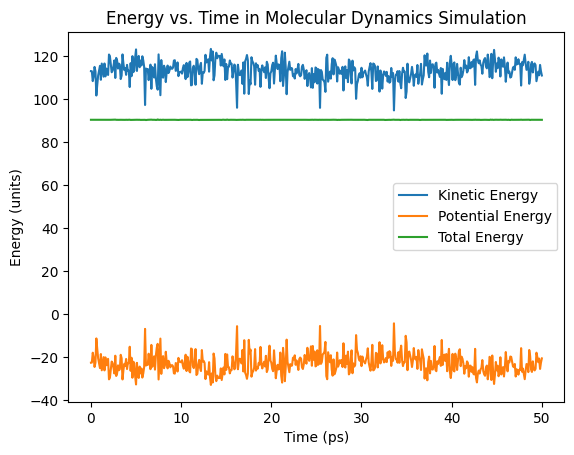

In [ ]:
plt.ioff()
plt.clf()

plt.plot(outt, ekin, label="Kinetic Energy")
plt.plot(outt, epot, label="Potential Energy")
plt.plot(outt, etot, label="Total Energy")

plt.xlabel("Time (ps)")
plt.ylabel("Energy (units)")

plt.title("Energy vs. Time in Molecular Dynamics Simulation")
plt.legend()

plt.draw()
plt.show()